In [91]:
import TMQGP as tm
import QuarkTM
import tqdm
from numpy import *

In [92]:
import h5py

In [93]:
import matplotlib
matplotlib.style.use('publication23')

In [94]:
erange = linspace(-5, 5, 201)
qrange = linspace(0, 5, 51)

In [95]:
mQ = 0.6

In [100]:
df = h5py.File('/home/const/Numerics/TMQGP/ipy/TMQGP/test/FitChi2/4ch_HI/0.00/data_single_170.hdf5')

Gtab = array(df['Q']['G'])
S = array(df['Q']['S'])

In [97]:
pt1 = QuarkTM.Particle(mQ, qrange, erange, Gtab=Gtab)

In [98]:
T = 0.2

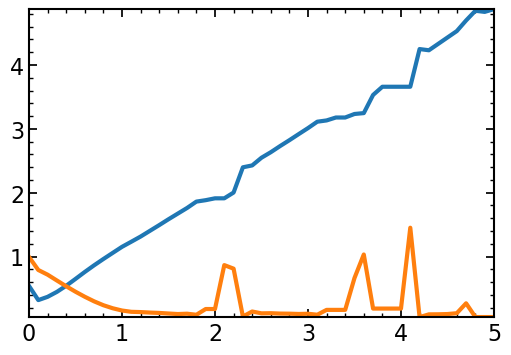

In [99]:
plt.plot(pt1.qrange, pt1.peaks)
plt.plot(pt1.qrange, pt1.widths)
# plt.ylim(0, 1)

## Debug the algorithm

In [14]:
from scipy.optimize import minimize

In [119]:
init = 0.4
sols = []
sols_rough = []
widths = []
for i, q, ge, s in zip(range(len(qrange)), qrange, pt1.Gtab.transpose(), S.transpose()):
    init = erange[argmin(imag(ge))]
    sols_rough += [init]
    # iIm = interp1d(erange, imag(ge), 'linear')
    iIm = Akima1DInterpolator(erange, imag(ge))
    iImS = Akima1DInterpolator(erange, imag(s))
    # plt.plot(erange, iIm(erange))

    # break
    x = minimize(iIm, init, bounds=[[0.9*init, 1.1*init]])
    print(i, x.x, init, x.status)
    # init = x.x
    sols += [x.x]
    widths += [-4*iImS(init)]

0 [0.29371624] 0.3000000000000007 0
1 [0.32003099] 0.3000000000000007 0
2 [0.37134367] 0.35000000000000053 0
3 [0.44098491] 0.4500000000000002 0
4 [0.53849271] 0.5500000000000007 0
5 [0.64307424] 0.6500000000000004 0
6 [0.75615856] 0.75 0
7 [0.86433402] 0.8500000000000005 0
8 [0.96312948] 0.9500000000000002 0
9 [1.05895806] 1.0500000000000007 0
10 [1.15463367] 1.1500000000000004 0
11 [1.25508327] 1.25 0
12 [1.35280714] 1.3500000000000005 0
13 [1.44631967] 1.4500000000000002 0
14 [1.52538288] 1.5500000000000007 0
15 [1.59822184] 1.6000000000000005 0
16 [1.69854815] 1.7000000000000002 0
17 [1.79955534] 1.8000000000000007 0
18 [1.89989743] 1.9000000000000004 0
19 [2.00002528] 2.0 0
20 [2.10010736] 2.1000000000000005 0
21 [2.20024094] 2.2 0
22 [2.30052373] 2.3000000000000007 0
23 [2.40112449] 2.4000000000000004 0
24 [2.50246313] 2.5 0
25 [2.59880933] 2.6000000000000005 0
26 [2.67107323] 2.6500000000000004 0
27 [2.74859368] 2.75 0
28 [2.84775984] 2.8500000000000005 0
29 [2.94879852] 2.95 0


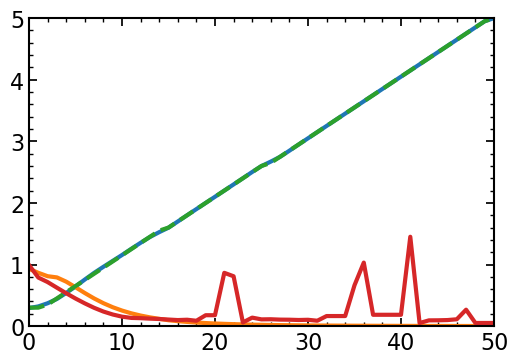

In [120]:
plt.plot(sols)
plt.plot(widths)
plt.plot(sols_rough, ls='--')
plt.ylim(0, 5)
plt.plot(pt1.widths)

In [121]:
i = 40

In [122]:
erange_dense = linspace(0, 5, 1000)

In [123]:
from scipy.interpolate import Akima1DInterpolator

(1.0, 5.0)

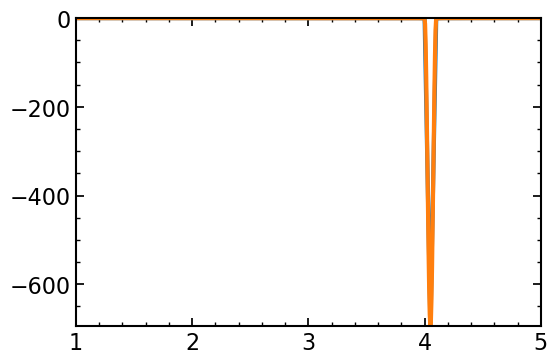

In [124]:
plt.plot(erange, imag(pt1.Gtab[:, i]))
# iIm = interp1d(erange, imag(pt1.Gtab[:, i]), 'quadratic')
iIm = Akima1DInterpolator(erange, imag(pt1.Gtab[:, i]))
plt.plot(erange_dense, iIm(erange_dense))

plt.xlim(1, 5)